## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

In [ ]:
!pip freeze

Hola voy a ejecutar el comando ```!pip freeze``` para cotillear a Google Colab

In [1]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.9.2'

#### **- Cargando el conjunto de datos**

In [8]:
# Importamos el dataset MNIST y cargamos los datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### **- Inspeccionando el conjunto de datos**

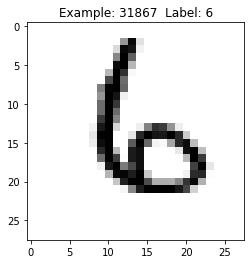

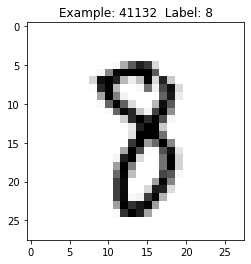

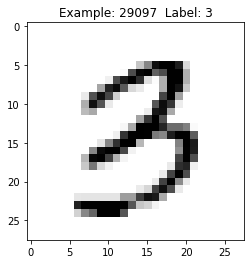

In [9]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:,:] 
  # Seleccionar el target num de mnist.train.labels
  label = y_train[num] 
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))

#### **- Acondicionando el conjunto de datos**

In [4]:
print(y_train[25555])

4


In [5]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC
y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
print(y_train.shape)
y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
print(y_tr.shape)
# print(y_tr[0])

(60000, 10)
(54000, 10)


In [ ]:
print(y_tr[36])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_tr[36].argmax(axis=0))

5


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [11]:
# Voy a necesitar importar una serie de modulos para programar mi red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Vamos a codificar la topología de nuestra primera red neuronal!!!
model = Sequential()
model.add(Flatten(input_shape=(28,28)))#Capa de entrada de 784
model.add(Dense(512, input_shape=(28*28,), activation="relu")) #Al haber aplanado nos queda un vector de 784
model.add(Dense(10, activation="softmax")) #Capa salida -> Mismo número de neuronas que de clases objetivo

# Ahí tenemos nuestro primer MLP con una única capa oculta de 512 neuronas

In [12]:
#Traigamos nuestro optimizador
from tensorflow.keras.optimizers import SGD
# Ahora que tengo definida la arquitectura, la compilo
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"]) #0.005 es el LR

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Por fin podemos entrenar nuestra primera red neuronal
print("[INFO]: Entrenando red neuronal...")
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=128)

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 4s 3ms/step - loss: 1.4732 - accuracy: 0.6859 - val_loss: 0.9735 - val_accuracy: 0.8155
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.7800 - accuracy: 0.8410 - val_loss: 0.6537 - val_accuracy: 0.8572
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.5854 - accuracy: 0.8648 - val_loss: 0.5334 - val_accuracy: 0.8723
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4996 - accuracy: 0.8769 - val_loss: 0.4698 - val_accuracy: 0.8840
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4505 - accuracy: 0.8850 - val_loss: 0.4303 - val_accuracy: 0.8897
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4180 - accuracy: 0.8908 - val_loss: 0.4025 - val_accuracy: 0.8940
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3945 - accuracy: 0.8959 - val_loss: 0

#### **- Observando el proceso de entrenamiento para tomar decisiones**

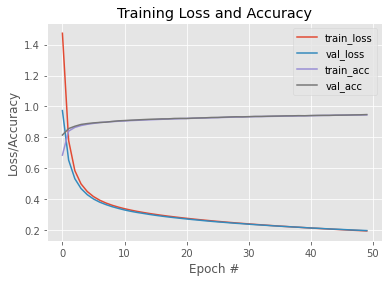

In [14]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [17]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=128)
print(y_te[0])
print(predictions[0])
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

"""
El support me dice el número de muestras por número
"""

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[9.99657132e-05 1.17608174e-07 3.63813015e-04 1.82715617e-03
 1.21794949e-06 8.13510342e-05 7.55782352e-08 9.97194886e-01
 2.50220255e-05 4.06237843e-04]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.95      0.92      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.92      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95

--------------------------------------------------------------------------

In [18]:
predictions[5555]

array([3.5345631e-05, 3.8234140e-07, 4.5966415e-05, 9.9919528e-01,
       6.9938132e-08, 5.9014617e-04, 1.8787725e-08, 2.3520126e-07,
       1.2863269e-04, 3.9568522e-06], dtype=float32)

In [19]:
predictions[5555].argmax(axis=0)

3

In [20]:
y_te[5555].argmax(axis=0)

3

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

In [21]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


#### **- Inspeccionando el conjunto de datos**

In [ ]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5248]] #Si la palabra no es relevante la cambia por ?
)
decoded

'? ? oil corp said it has completed a ? well on its ? ? in jefferson davis ? la which is currently producing at a rate of 1 1 mln cubic feet of gas and 40 barrels of condensate daily the company said it has a 20 pct working interest in the well which is flowing from lower ? ? sand ? between 10 104 and 10 110 feet additional ? but possibly productive zones exist behind the pipe it added it said the remaining owners are privately held petroleum companies reuter 3'

#### **- Acondicionando el conjunto de datos**

In [22]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números 
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [23]:
# Convertimos nuestras palabras a números (One hot encoding)
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [24]:
print(x_test[3])

[0. 1. 1. ... 0. 0. 0.]


In [25]:
# Convertimos nuestros labels (categoría reseña) a one-hot encoding
# Si no las convierto a one-hot encoding necesito usar sparse_categorical_crossentropy
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(training_labels)
y_test = to_categorical(testing_labels)
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [26]:
print(y_test[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Vamos a codificar la topología de nuestro MLP
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(WORD_LIMIT,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [28]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [29]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2) #Validation_split me permite asignar el validation value

Epoch 1/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4741 - accuracy: 0.6821 - val_loss: 1.0159 - val_accuracy: 0.7713
Epoch 2/20
225/225 [==============================] - 1s 4ms/step - loss: 0.5646 - accuracy: 0.8778 - val_loss: 0.8842 - val_accuracy: 0.8013
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 0.2736 - accuracy: 0.9432 - val_loss: 0.9013 - val_accuracy: 0.8047
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 0.1930 - accuracy: 0.9539 - val_loss: 0.9081 - val_accuracy: 0.8052
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 0.1608 - accuracy: 0.9576 - val_loss: 0.9342 - val_accuracy: 0.8036
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 0.1413 - accuracy: 0.9577 - val_loss: 1.0309 - val_accuracy: 0.7891
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1335 - accuracy: 0.9588 - val_loss: 1.0274 - val_accuracy: 0.7913
Epoch 

#### **- Observando el proceso de entrenamiento para tomar decisiones**

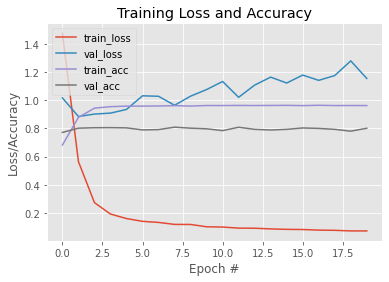

In [30]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [31]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.2172 - accuracy: 0.7965
Loss 1.2171802520751953, accuracy 0.7965271472930908


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
# Vamos a codificar la topología de nuestro MLP
model_reg = Sequential()
model_reg.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(WORD_LIMIT,)))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_reg.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_reg.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_reg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 4ms/step - loss: 3.3540 - accuracy: 0.5438 - val_loss: 1.8155 - val_accuracy: 0.7240
Epoch 2/20
225/225 [==============================] - 1s 4ms/step - loss: 1.7060 - accuracy: 0.7427 - val_loss: 1.6853 - val_accuracy: 0.7451
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 1.5660 - accuracy: 0.7544 - val_loss: 1.6073 - val_accuracy: 0.7418
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4845 - accuracy: 0.7758 - val_loss: 1.6485 - val_accuracy: 0.7462
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4640 - accuracy: 0.7817 - val_loss: 1.5903 - val_accuracy: 0.7590
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4391 - accuracy: 0.7926 - val_loss: 1.5789 - val_accuracy: 0.7529
Epoch 7/20
225/225 [==============================] - 1s 4ms/step - loss: 1.3912 - accuracy: 0.7991 - val_loss: 1.5778 - val_accuracy: 0.7574
Epoch 

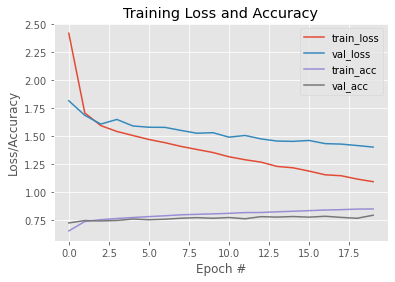

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_reg.predict(x_test)
loss, accuracy = model_reg.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.4410 - accuracy: 0.7671
Loss 1.4409772157669067, accuracy 0.767141580581665


#### **- Dropout**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Vamos a codificar la topología de nuestro MLP
model_drop = Sequential()
model_drop.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75))
model_drop.add(Dense(64,activation='relu'))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75))
model_drop.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_drop.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_drop.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 1s 4ms/step - loss: 3.0009 - accuracy: 0.2597 - val_loss: 1.6684 - val_accuracy: 0.5882
Epoch 2/20
225/225 [==============================] - 1s 4ms/step - loss: 1.8615 - accuracy: 0.5323 - val_loss: 1.4900 - val_accuracy: 0.6784
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 1.6863 - accuracy: 0.5937 - val_loss: 1.4201 - val_accuracy: 0.7001
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 1.5886 - accuracy: 0.6134 - val_loss: 1.3744 - val_accuracy: 0.7062
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 1.5032 - accuracy: 0.6253 - val_loss: 1.3301 - val_accuracy: 0.7056
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4579 - accuracy: 0.6489 - val_loss: 1.2958 - val_accuracy: 0.7062
Epoch 7/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4510 - accuracy: 0.6474 - val_loss: 1.2813 - val_accuracy: 0.7073
Epoch 

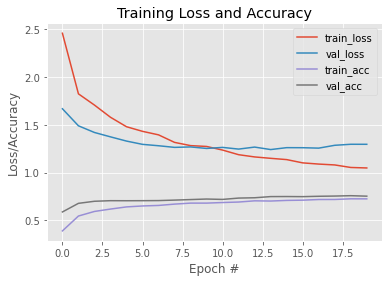

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# ¿Y si desconectamos mayor porcentaje de neuronas?

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_drop.predict(x_test)
loss, accuracy = model_drop.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.4296 - accuracy: 0.7329
Loss 1.429582953453064, accuracy 0.732858419418335


#### **- Batch Normalization**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential()
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 5ms/step - loss: 4.1825 - accuracy: 0.1847 - val_loss: 1.9843 - val_accuracy: 0.6411
Epoch 2/20
225/225 [==============================] - 1s 4ms/step - loss: 2.2351 - accuracy: 0.5277 - val_loss: 1.4946 - val_accuracy: 0.6795
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 1.8509 - accuracy: 0.5912 - val_loss: 1.3766 - val_accuracy: 0.7006
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 1.6653 - accuracy: 0.6287 - val_loss: 1.3170 - val_accuracy: 0.7023
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 1.5476 - accuracy: 0.6545 - val_loss: 1.2676 - val_accuracy: 0.7101
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4463 - accuracy: 0.6697 - val_loss: 1.2017 - val_accuracy: 0.7240
Epoch 7/20
225/225 [==============================] - 1s 4ms/step - loss: 1.4207 - accuracy: 0.6655 - val_loss: 1.1687 - val_accuracy: 0.7273
Epoch 

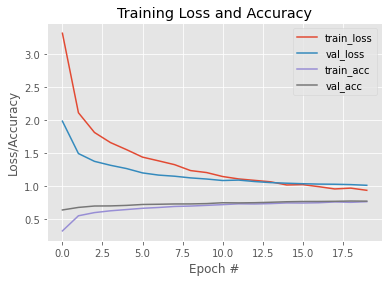

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_bn.predict(x_test)
loss, accuracy = model_bn.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.7636
Loss 1.067622423171997, accuracy 0.7635797262191772
